<a href="https://colab.research.google.com/github/sbylash/23_Shasia-Sasa_PCVK/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

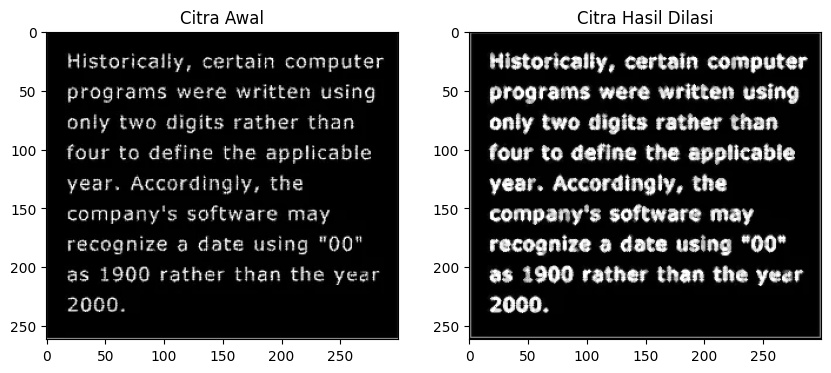

In [5]:
image_path = '/content/drive/MyDrive/Week2/Images/morphology.png'
image = cv2.imread(image_path, 0)

def dilate_image(image):
    structuring_element = np.array([[0, 1, 0],
                                    [1, 1, 1],
                                    [0, 1, 0]], dtype=np.uint8)

    rows, cols = image.shape

    dilated_image = np.zeros_like(image)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = image[i-1:i+2, j-1:j+2]

            dilated_image[i, j] = np.max(neighborhood * structuring_element)

    return dilated_image

dilated_image = dilate_image(image)

# Plotting the original and results
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('on')

# Dilated image
plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('on')

plt.show()

Structuring Element (3x3 Cross):
[[0 1 0]
 [1 1 1]
 [0 1 0]]


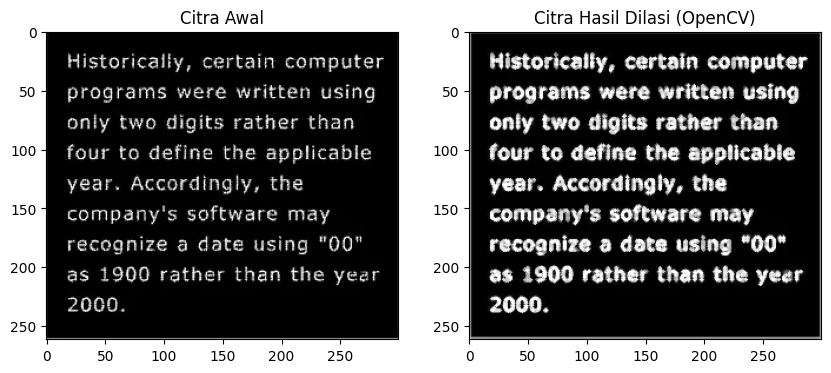

In [6]:
image = cv2.imread(image_path, 0)

structuring_element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

dilated_image_cv = cv2.dilate(image, structuring_element)

print("Structuring Element (3x3 Cross):")
print(structuring_element)

# Plotting the original and results
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('on')

# Dilated image
plt.subplot(1, 2, 2)
plt.imshow(dilated_image_cv, cmap='gray')
plt.title('Citra Hasil Dilasi (OpenCV)')
plt.axis('on')

plt.show()

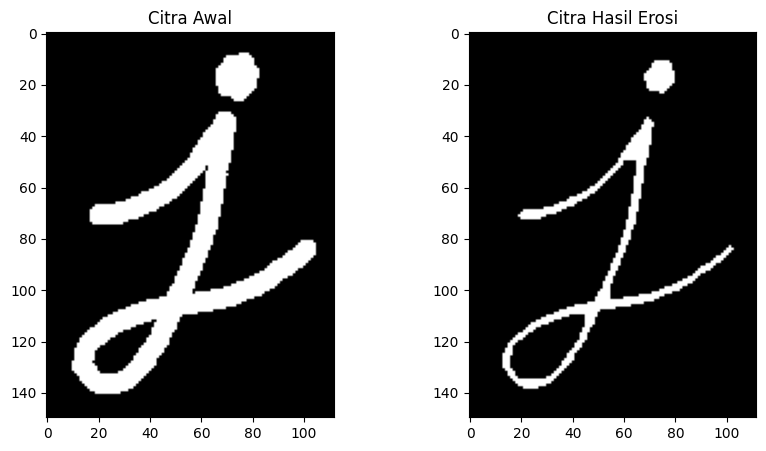

In [8]:
image_path_erosion = '/content/drive/MyDrive/Week2/Images/j.png'
image_erosion = cv2.imread(image_path_erosion, 0)

def erode_image(image):
    structuring_element = np.ones((5, 5), dtype=np.uint8)

    rows, cols = image.shape

    eroded_image = np.zeros_like(image)

    for i in range(2, rows - 2):
        for j in range(2, cols - 2):
            neighborhood = image[i-2:i+3, j-2:j+3]

            eroded_image[i, j] = np.min(neighborhood * structuring_element)

    return eroded_image

eroded_image = erode_image(image_erosion)

# Plotting the original and results
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_erosion, cmap='gray')
plt.title('Citra Awal')
plt.axis('on')

# Eroded image
plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('on')

plt.show()

Structuring Element (5x5 Square):
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


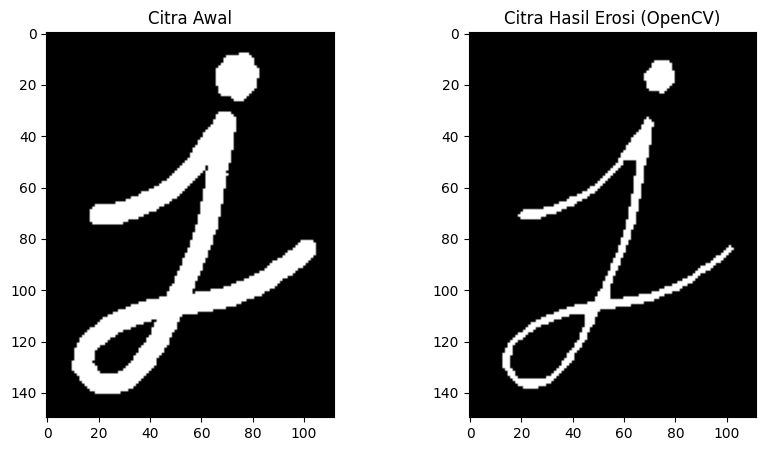

In [9]:
image_erosion = cv2.imread(image_path_erosion, 0)

structuring_element_5x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

eroded_image_cv = cv2.erode(image_erosion, structuring_element_5x5)

print("Structuring Element (5x5 Square):")
print(structuring_element_5x5)

# Plotting the original and results
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_erosion, cmap='gray')
plt.title('Citra Awal')
plt.axis('on')

# Eroded image
plt.subplot(1, 2, 2)
plt.imshow(eroded_image_cv, cmap='gray')
plt.title('Citra Hasil Erosi (OpenCV)')
plt.axis('on')

plt.show()

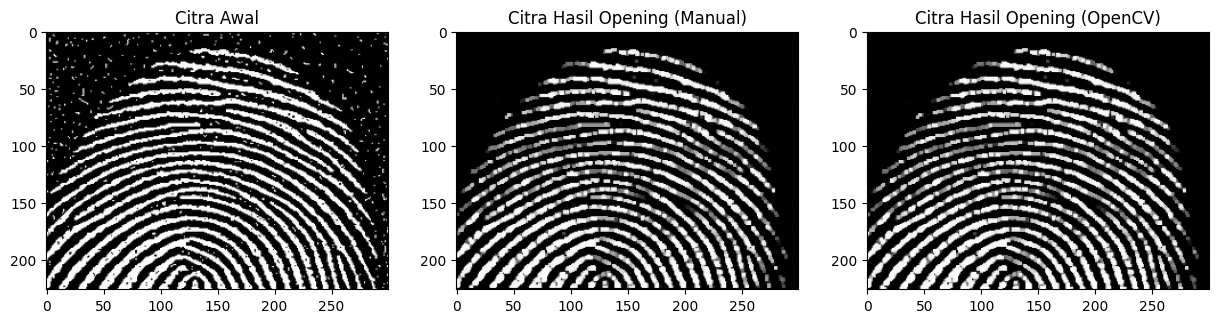

In [15]:
image_path_fingerprint = '/content/drive/MyDrive/Week2/Images/fingerprint.png'
image_fingerprint = cv2.imread(image_path_fingerprint, 0)

def manual_opening(image):
    structuring_element = np.ones((3, 3), dtype=np.uint8)

    rows, cols = image.shape

    eroded_image = np.zeros_like(image)
    opened_image = np.zeros_like(image)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = image[i-1:i+2, j-1:j+2]
            eroded_image[i, j] = np.min(neighborhood * structuring_element)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = eroded_image[i-1:i+2, j-1:j+2]
            opened_image[i, j] = np.max(neighborhood * structuring_element)

    return eroded_image, opened_image

eroded_image_manual, opened_image_manual = manual_opening(image_fingerprint)

structuring_element_3x3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
opened_image_cv = cv2.morphologyEx(image_fingerprint, cv2.MORPH_OPEN, structuring_element_3x3)

# Plotting the original and results
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image_fingerprint, cmap='gray')
plt.title('Citra Awal')
plt.axis('on')

# Manual Opening result
plt.subplot(1, 3, 2)
plt.imshow(opened_image_manual, cmap='gray')
plt.title('Citra Hasil Opening (Manual)')
plt.axis('on')

# OpenCV Opening result
plt.subplot(1, 3, 3)
plt.imshow(opened_image_cv, cmap='gray')
plt.title('Citra Hasil Opening (OpenCV)')
plt.axis('on')

plt.show()

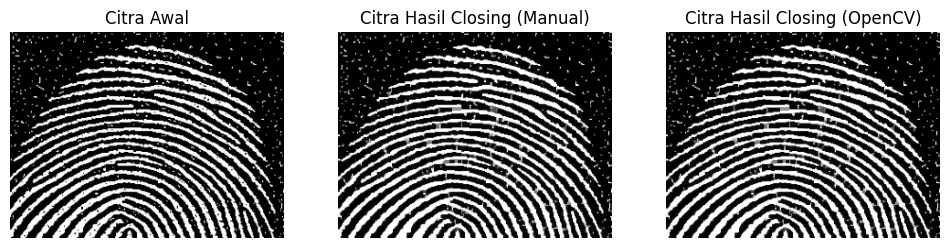

In [20]:
image_path = '/content/drive/MyDrive/Week2/Images/fingerprint.png'
fingerprint_img = cv2.imread(image_path, 0)

kernel = np.ones((3, 3), np.uint8)

dilated_img = cv2.dilate(fingerprint_img, kernel, iterations=1)
closing_manual = cv2.erode(dilated_img, kernel, iterations=1)

closing_opencv = cv2.morphologyEx(fingerprint_img, cv2.MORPH_CLOSE, kernel)

# Plotting the original and results
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(fingerprint_img, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

# Manual Closing result
plt.subplot(1, 3, 2)
plt.imshow(closing_manual, cmap='gray')
plt.title('Citra Hasil Closing (Manual)')
plt.axis('off')

# OpenCV Closing result
plt.subplot(1, 3, 3)
plt.imshow(closing_opencv, cmap='gray')
plt.title('Citra Hasil Closing (OpenCV)')
plt.axis('off')

plt.show()